# Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
dfx  = pd.read_csv('D:\My work world\AI Mafia\dataset\linearX.csv')
dfy = pd.read_csv('D:\My work world\AI Mafia\dataset\linearY.csv')

In [3]:
dfx.shape

(99, 1)

In [4]:
dfy.shape

(99, 1)

In [5]:
dfx.head()

,9.1
0,8.0
1,9.1
2,8.4
3,6.9
4,7.7


In [6]:
dfy.head()

,0.99523
0,0.99007
1,0.99769
2,0.99386
3,0.99508
4,0.99630


In [11]:
x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))

In [12]:
x

array([ 8. ,  9.1,  8.4,  6.9,  7.7, 15.6,  7.3,  7. ,  7.2, 10.1, 11.5,
        7.1, 10. ,  8.9,  7.9,  5.6,  6.3,  6.7, 10.4,  8.5,  7.4,  6.3,
        5.4,  8.9,  9.4,  7.5, 11.9,  7.8,  7.4, 10.8, 10.2,  6.2,  7.7,
       13.7,  8. ,  6.7,  6.7,  7. ,  8.3,  7.4,  9.9,  6.1,  7. ,  5.4,
       10.7,  7.6,  8.9,  9.2,  6.6,  7.2,  8. ,  7.8,  7.9,  7. ,  7. ,
        7.6,  9.1,  9. ,  7.9,  6.6, 11.9,  6.5,  7.1,  8.8,  7.5,  7.7,
        6. , 10.6,  6.6,  8.2,  7.9,  7.1,  5.6,  6.4,  7.5,  9.8,  7. ,
       10.5,  7.1,  6.2,  6.5,  7.7,  7.2,  9.3,  8.5,  7.7,  6.8,  7.8,
        8.7,  9.6,  7.2,  9.3,  8.1,  6.6,  7.8, 10.2,  6.1,  7.3,  7.3])

# Data Preprocessing and Visualization

In [13]:
import matplotlib.pyplot as plt

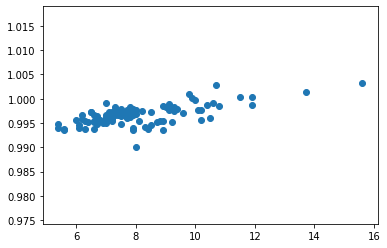

In [16]:
# it is not plotted wrt origin
plt.scatter(x,y)
plt.show()

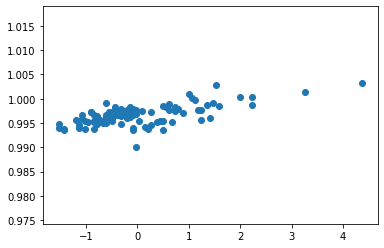

In [18]:
# scattering points wrt origin
x = (x - x.mean())/x.std()
plt.scatter(x,y)
plt.show()

# Gradient Descent Algorithm

In [19]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [29]:
def error(x,y,theta):
    error = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        error+= (y[i] - hx)**2
    return error

In [30]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

In [31]:
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [32]:
final_theta, error_list,theta_list = gradientDescent(x,y)

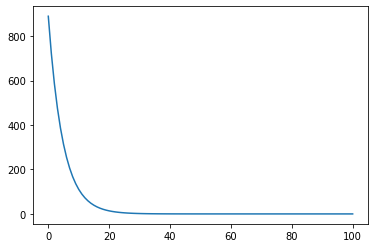

In [34]:
plt.plot(error_list)
plt.show()

In [35]:
final_theta

array([0.996554 , 0.0013579])

In [36]:
# plotting line for testing data
xtest = np.linspace(-2,6,10)
xtest

array([-2.        , -1.11111111, -0.22222222,  0.66666667,  1.55555556,
        2.44444444,  3.33333333,  4.22222222,  5.11111111,  6.        ])

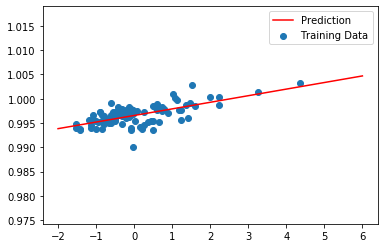

In [42]:
plt.scatter(x,y,label="Training Data")
plt.plot(xtest,hypothesis(xtest,final_theta),color="Red",label="Prediction")
plt.legend()
plt.show()